In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split

%matplotlib inline

In [2]:
cancer = pd.read_csv('data/cancer.csv')
cancer[:5]

,type,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,malignant,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,malignant,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,malignant,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,malignant,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,malignant,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [3]:
boston = pd.read_csv('data/boston.csv')
boston[:5]

,Price,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,24.0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,21.6,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,34.7,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,33.4,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,36.2,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [4]:
y = boston['Price']
X = boston.values[:, 1:].astype('float32')

In [5]:
from sklearn.linear_model import Ridge

Q: 샘플수가 충분한가?

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [7]:
비율범위 = np.arange(0.1, 1.1, 0.1)

train_results = {}
for 비율 in 비율범위:
    샘플수 = int(len(X_train) * 비율) + 1
    X_train_batch = X_train[:샘플수]
    y_train_batch = y_train[:샘플수]
    
    ridge = Ridge(alpha=1.0).fit(X_train_batch, y_train_batch)
    train_score = ridge.score(X_train_batch, y_train_batch)
    test_score = ridge.score(X_test, y_test)
    train_results[샘플수] = (train_score, test_score)
    
train_results = pd.DataFrame(train_results).T
train_results.columns = ['train', 'test']
train_results

,train,test
38,0.913198,0.730086
76,0.829435,0.701353
114,0.722954,0.693663
152,0.740683,0.695032
190,0.735033,0.693457
228,0.739417,0.726768
266,0.723549,0.740727
304,0.730937,0.745303
342,0.733277,0.743694
380,0.733671,0.742101


In [8]:
train_test_styles = {'train': 'go--', 'test': 'ro--'}

학습 곡선

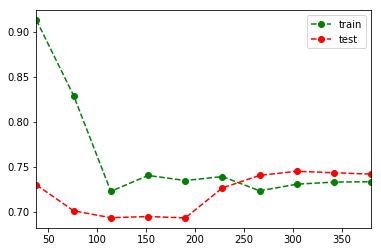

In [9]:
train_results.plot(style=train_test_styles)

## 로지스틱 회귀

In [10]:
cancer[:3]

,type,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,malignant,17.99,10.38,122.8,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.6,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,malignant,20.57,17.77,132.9,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.8,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,malignant,19.69,21.25,130.0,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.5,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758


In [11]:
y = cancer['type']
X = cancer.values[:, 1:].astype('float32')

In [12]:
y.value_counts()

benign       357
malignant    212
Name: type, dtype: int64

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [14]:
from sklearn.linear_model import LogisticRegression

In [15]:
logreg = LogisticRegression().fit(X_train, y_train)
logreg

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [16]:
logreg.score(X_test, y_test)

0.965034965034965

활성화 함수에 따른 효과

In [17]:
예측확률 = logreg.predict_proba(X_test)

In [18]:
pd.DataFrame(예측확률)[:10]

,0,1
0,0.994221,0.005779
1,0.088435,0.911565
2,0.998029,0.001971
3,0.999358,0.000642
4,0.935079,0.064921
5,0.992215,0.007785
6,0.999799,0.000201
7,0.988009,0.011991
8,0.000000,1.000000
9,0.981588,0.018412


In [19]:
C_range = [0.001, 0.01, 0.1, 1., 10., 100., 1000.]

train_results = {}
for C in C_range:
    logreg = LogisticRegression(C=C).fit(X_train, y_train)    
    train_score = logreg.score(X_train, y_train)
    test_score = logreg.score(X_test, y_test)
    train_results[C] = (train_score, test_score)
    
train_results = pd.DataFrame(train_results).T
train_results.columns = ['train', 'test']
train_results

,train,test
0.001,0.910798,0.958042
0.010,0.931925,0.958042
0.100,0.938967,0.965035
1.000,0.957746,0.965035
10.000,0.967136,0.965035
100.000,0.983568,0.958042
1000.000,0.976526,0.951049


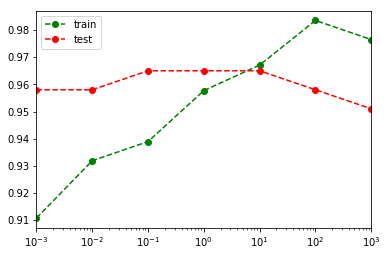

In [20]:
train_results.plot(logx=True, style=train_test_styles)

Q: 샘플이 모자르고, 구하기 어렵다면?

In [21]:
iris = pd.read_csv('data/iris.data', header=None)

In [22]:
평균, 편차 = iris[0].mean(), iris[0].std()

In [23]:
np.random.normal(평균, 편차, size=100)

array([ 5.85683319,  5.92964159,  5.45122984,  6.36029156,  3.65035595,
        5.85801454,  6.34758455,  5.80609812,  4.35033642,  6.68389636,
        6.89905802,  6.17215959,  4.88252598,  6.57147386,  5.08075857,
        6.83085999,  7.4257369 ,  4.82862575,  5.58400689,  5.85241679,
        5.00991493,  6.61471516,  5.23278407,  4.94269043,  5.4690828 ,
        6.12532347,  5.34448348,  6.31310745,  5.72691456,  5.56880828,
        5.23304086,  5.9968281 ,  5.37788941,  5.61587465,  6.85519987,
        5.70447001,  7.07490782,  6.66842396,  6.96227558,  5.08492867,
        5.89559771,  6.50427801,  6.43833687,  6.06636503,  7.54036932,
        5.60774603,  6.34385673,  6.72771839,  7.07838277,  5.44951782,
        6.21822471,  6.3051136 ,  4.48011391,  4.95255061,  5.15696563,
        5.4854438 ,  4.65740731,  6.03847798,  5.19218946,  6.36171302,
        5.61971811,  5.66102494,  6.39908134,  5.42221399,  5.43548063,
        6.439147  ,  6.49891988,  5.71718563,  5.92836095,  5.48

In [24]:
y = iris[4]
X = iris.values[:, :4].astype('float32')

In [25]:
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [26]:
logreg = LogisticRegression(C=1.0).fit(X_train, y_train)

In [27]:
logreg.score(X_test, y_test)

0.94736842105263153

In [28]:
w = logreg.coef_
b = logreg.intercept_

In [29]:
w.shape

(3, 4)

In [30]:
from deepy.dataset import mnist

In [31]:
(X_train, y_train), (X_test, y_test) = mnist.load_mnist(
    flatten=False, normalize=False)

In [32]:
X_train.shape

(60000, 1, 28, 28)

In [33]:
x = X_train[0]

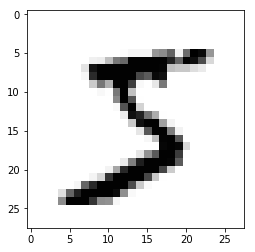

In [34]:
plt.imshow(x.reshape(28, 28), 'Greys')

In [35]:
y_train[0]

5

In [36]:
X_train = X_train.reshape(-1, 1*28*28)
X_test = X_test.reshape(-1, 1*28*28)

In [37]:
X_train.shape, X_test.shape

((60000, 784), (10000, 784))

In [38]:
X_train.dtype

dtype('uint8')

In [39]:
X_train = X_train.astype('float32') / 255.
X_test = X_test.astype('float32') / 255.

In [40]:
X_train.max(), X_test.max()

(1.0, 1.0)

In [41]:
from sklearn.linear_model import SGDClassifier

In [42]:
#logreg = LogisticRegression().fit(X_train, y_train)
logreg = SGDClassifier(loss='log', tol=1e-3).fit(X_train, y_train)

In [43]:
y_pred = logreg.predict(X_test)

In [44]:
logreg.score(X_test, y_test)

0.91539999999999999

# 1985 결정트리

In [45]:
from sklearn.tree import DecisionTreeClassifier

In [46]:
y = cancer['type']
X = cancer.values[:, 1:].astype('float32')

In [47]:
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [48]:
tree = DecisionTreeClassifier().fit(X_train, y_train)
tree

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [49]:
tree.score(X_train, y_train), tree.score(X_test, y_test)

(1.0, 0.90909090909090906)

In [50]:
tree_depth4 = DecisionTreeClassifier(max_depth=4).fit(X_train, y_train)

In [51]:
tree_depth4.score(X_train, y_train), tree_depth4.score(X_test, y_test)

(0.98356807511737088, 0.93006993006993011)

결정트리 시각화

In [52]:
from sklearn.tree import export_graphviz

In [53]:
export_graphviz(tree_depth4, out_file='tree.dot', 
                class_names=['M', 'B'], 
                feature_names=cancer.columns[1:])

설치가 필요합니다.

```
$ conda install python-graphviz
```

In [54]:
import graphviz

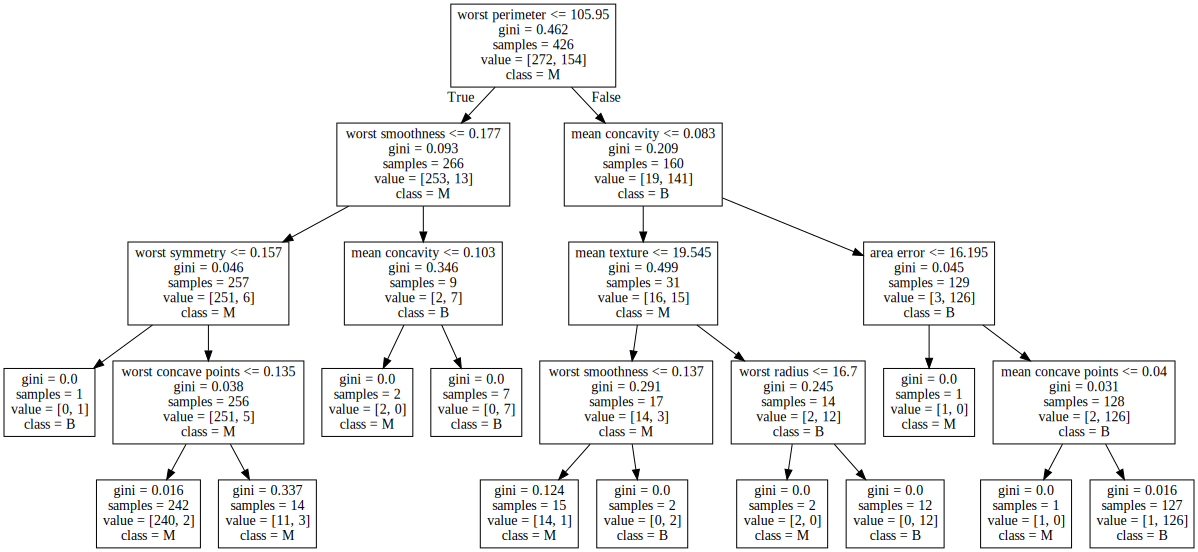

In [56]:
with open('tree.dot') as f:
    dot_graph = f.read()
display(graphviz.Source(dot_graph))